
Method = (:direct, :ADNLProblem, :ipopt)
This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:     1205
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    81810

Total number of variables............................:      404
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      305
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.1000000e+00 2.10e+00 2.78e-1

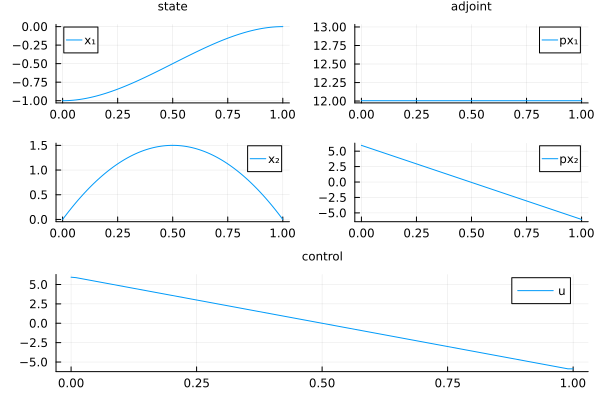

In [1]:
using OptimalControl

t0 = 0
tf = 1

ocp = Model()

state!(ocp, 2)   # dimension of the state
control!(ocp, 1) # dimension of the control

time!(ocp, [t0, tf])

constraint!(ocp, :initial, [ -1, 0 ])
constraint!(ocp, :final,   [  0, 0 ])

A = [ 0 1
      0 0 ]
B = [ 0
      1 ]

constraint!(ocp, :dynamics, (x, u) -> A*x + B*u)

objective!(ocp, :lagrange, (x, u) -> 0.5u^2)

sol = solve(ocp)
plot(sol)